# Einfaches Beispiel einer Datenanalyse zur Veranschaulichung

In der ersten Übung würde ich Euch gerne ein Beispiel zeigen, wie eine Datenanalyse entlang der wesentlichen Schritte aussieht. Wichtig ist, dass dies eine starke Vereinfachung ist und kein Anspruch hat alle Aspekte aufzugreifen.

Es gibt einen ersten guten Überblick der zu vermittelnden Inhalte und fordert Euch hier und da heraus, ein paar Aufgaben zu absolvieren.

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

Anbei eine Übersicht, der die wesentlichen Schritte des Datenanalyseprozesses noch einmal darlegt. Wichtig ist, dass der Prozess sich immer **leicht unterscheidet** und es nicht **den einen Datenanalyseprozess** gibt. Es sind aber in der ein oder anderen Form immer die gleichen Elemente/Schritte enthalten.

Wenn es hierzu noch Fragen gibt, schaut noch einmal auf die Unterlagen zu der **Veranstaltung 1** oder stellt diese in der kommenden Übung.

<div>
<img src="./src/CRISPDM.png" width="700"/>
</div>

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

# General Setup how to structure a Notebook

1. **Import packages**
1. **Hypothesis**
    1. Welche Fragen möchte ich beantworten
    1. Zielvariablen benennen
    1. Performance Metriken hinterlegen
1. **Gathering Data**
1. **Assess Data**
    1. Results/Findings
1. **Clean Data**
    1. First Flaw
        1. Define
        1. Code
        1. Test
    1. Second Flaw
        1. Define
        1. Code
        1. Test
1. **Storing the Data**
1. **Exploratory Data Analysis**
1. **Trainingsset vorbereiten**
    1. Performance Metriken evaluieren
1. **Feature Engineering / Data Transformation**
1. **Modelling**
    1. Model1
        1. Model1 definieren
        1. Model1 training
        1. Model1 Performance Assessment
    1. Modelx
        1. Modelx definieren
        1. Modelx training
        1. Modelx Performance Assessment
1. **Model optimieren / Hyperparameter tuning**
1. **Visualizing your findings**
1. **Result interpretation**

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

# Datensatz und zu lösende Herausforderung

Datensatz stammt ursprünglich vom **National Institute of Diabetes and Digestive and Kidney Diseases**. 

Das **Ziel** des Datensatzes ist die diagnostische Vorhersage, ob ein Patient Diabetes hat oder nicht, basierend auf bestimmten diagnostischen Messungen, die im Datensatz enthalten sind.

Link zur Quelle: [Datenset von Kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database)

**Aufgabe 1:** 
- Wie würdet Ihr normalerweise die Teile **Hypothesis**, **Gathering Data** und **Assess Data/Finding** dokumentieren? 
- Was würde darüber hinaus dokumentiert werden?

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

# Beispiel Datenanalyse

## Import der benötigten Packages

In [3]:
!pip install pandas_profiling

     |████████████████████████████████| 324 kB 1.5 MB/s eta 0:00:01
     |████████████████████████████████| 344 kB 2.4 MB/s eta 0:00:01
     |████████████████████████████████| 102 kB 3.9 MB/s eta 0:00:01
     |████████████████████████████████| 296 kB 373 kB/s eta 0:00:01
     |████████████████████████████████| 652 kB 2.6 MB/s eta 0:00:01
     |████████████████████████████████| 4.7 MB 3.6 MB/s eta 0:00:01     |███████████████████████████████ | 4.6 MB 3.6 MB/s eta 0:00:01
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27096 sha256=20445c46060a0229b4a83ff728c0abfa5364be5fd5a32445d84cf5f4929040fd
  Stored in directory: /Users/pelle-svante.john/Library/Caches/pip/wheels/1d/05/04/c6d7d3b66539d9e659ac6dfe81e2d0fd4c1a8316cc5a403300
Successfully built htmlmin


In [1]:
import pandas as pd
import ydata_profiling as pp
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Hypothesen & Zielvariablen
- Welches Verhalten haben Schwangerschaften auf Diabetes?
- Welchen Einfluss hat das Alter auf Diabetes?
- ...

## Gather Data

Panda bietet vorgefertigte Funktionen, die das Laden eines Datensets vereinfachen. Hier verwenden wir die Funktion
```python
pandas.read_csv
```
Lasst uns gemeinsam einen Blick auf die Dokumentation werfen: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

In [2]:
diabetes_df = pd.read_csv('./src/diabetes.csv')

Der erste Schritt ist ein Überblick über das Datenset zu erhalten, auch hier gibt es einfache Funktionen, die Ihr heranziehen könnt. Hier verwenden wir die Funktion:
```python
pandas.DataFrame.head
```
Hier auch noch einmal der Blick auf die Dokumentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html

## Assess Data

In [3]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Wichtig**: Ihr müsst ein gutes fachliches Verständnis der Spalten haben. Wie bereits am Anfang des Kurses erwähnt, könnt Ihr nur Kontext geben, wenn Ihr die Daten nachvollziehen könnt. Hier einmal eine Übersicht der Spalten, die ich aus der Dokumentation gezogen habe.

- **Pregnancies**: Anzahl der Schwangerschaften
- **Glucose**: Glukoselevel der Patienten
- **Blood Pressure**: Blutdruck
- **SkinThickness**: Dicke der Haut des Patienten in mm
- **Insulin**: Insulin-Level der Patienten (Zeitraum 2 Stunden)
- **BMI**: Body-Mass-Index (Gewicht in kg / Größe in m)^2
- **DiabetesPedigreeFunction**: Vorgeschichte von Diabetes mellitus in der Verwandtschaft
- **Age**: Alter des Patienten
- **Outcome**: Ob ein Patient Diabetes hat oder nicht

**Hinweis**: Die Dokumentation kann noch ausführlicher sein.

Um noch ein wenig besseres Verständnis über das Datenset zu erhalten, lassen wir uns erst einmal **Histogramme** ausgeben. Auch hier bietet Pandas eine Standardfunktionalität.

```python
pandas.DataFrame.hist
```

Hier die Dokumentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

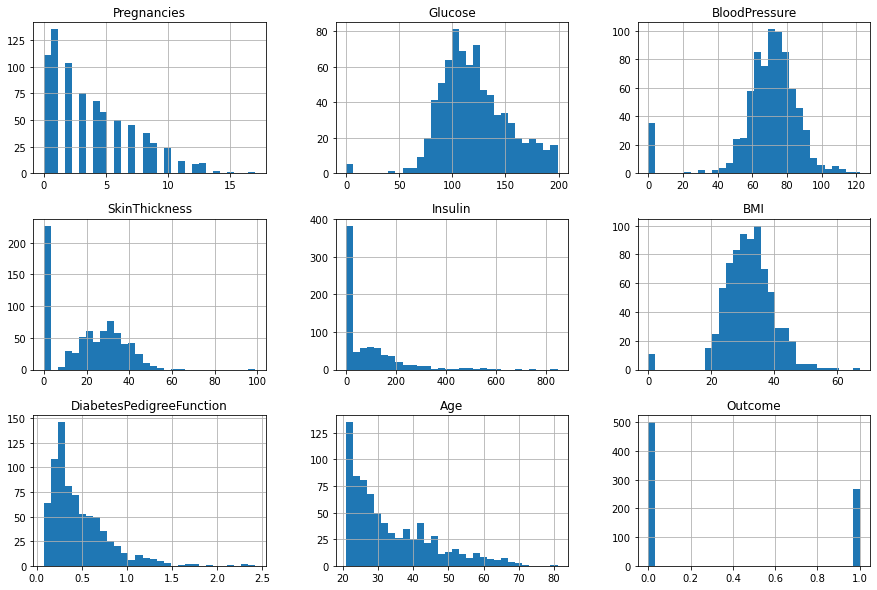

In [4]:
diabetes_df.hist(bins=30, figsize=(15,10))

**Aufgabe 2**: Was sind Eure Beobachtungen habt Ihr bereits bei der Sichtung der Daten?

In [5]:
#SOLUTION HERE

 Bei der Auswahl dieses Datensets aus einer größeren Datenbank wurden mehrere Einschränkungen gemacht. Insbesondere sind alle Patienten hier  mindestens 21 Jahre alt. Was nicht ersichtlich ist, dass Sie alle weiblich sind und von Pima-Indianern abstammen.
 
Ein weiter Punkt ist, dass wir direkt identfizieren, was **Numerisch** und **Kategorisch** ist. Hier werden wir im weiteren Kursverlauf weiter eingehen.

Wichtig ist, dass wir uns Gedanken machen über:
- Art der Daten in der jeweiligen Spalte / Merkmal
- Potenzielle Fehler in den Daten frühzeitig identifizieren und Schritte in der Datenbereinigung bereits skizzieren
- Potenziell weitere Recherchen über die Werteskalen für die jeweilige Spalte / Merkmal recherchieren

Des Weiteren gibt es viele weitere Funktionen, einen ersten Einblick auf das Datenset zu erhalten. Ich würde Euch gerne noch eine Übersicht vorstellen, die Euch einige allgemeine statistische Informationen über den Datensatz zur Verfügung stellt. Dieser **simplifiziert die Erstanalyse massiv** und erstellt wesentliche Erkentnisse **"Out-of-the-Box"**:

In [6]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
#Gibt die wichtigsten Kennzahlen pro Spalte wieder
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
# Gibt ein sehr ausführlichen Report über die Daten wieder
pp.ProfileReport(diabetes_df, minimal=True)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
duplicate = diabetes_df[diabetes_df.duplicated()]
print("Check, ob doppelte Zeilen im DataFrame vorhanden sind:")
duplicate

Check, ob doppelte Zeilen im DataFrame vorhanden sind:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


### Results/Findings

**Wichtige Erkenntnisse:**

#### Keine doppelten Zeilen im DataFrame

#### Kann der Mindestwert der unten aufgeführten Spalten Null (0) sein?
In diesen Spalten macht ein Wert von Null keinen Sinn und bedeutet daher einen fehlenden Wert.

Folgende Spalten oder Variablen haben einen ungültigen Nullwert:
- Glucose
- BloodPressure
- SkinThickness
- Insulin
- BMI

### Kleine "Anmerkung"

Wir merken, dass die Daten bereits ziemlich gut vorbereitet sind. Das ist im "realen Leben" nicht immer der Fall. Hier eine kleine Anekdote, die Euch im weiteren Verlauf des Kurses begleiten wird.

<div>
<img src="./src/real_data.png" width="500"/>
</div>

## Clean Data

### Erster Korrektur

Nullen durch NaN ersetzen, da Zählen einfacher ist und NaN durch geeignete Werte ersetzt wird.

Hier einmal die Links zu den Funktionen, falls Ihr den Code nachvollziehen wollt.

- [pandas.DataFrame.copy](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.copy.html)
- [pandas.DataFrame.replace](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html)
- [pandas.DataFrame.isnull](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isnull.html)
- [pandas.DataFrame.sum](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html)

In [10]:
# Erstelle eine Kopie der Daten, wenn Dir Fehler unterläuft hast Du noch Originaldaten
diabetes_df_copy = diabetes_df.copy(deep = True)

# Ersetze die Werte durch NaN-Werte
diabetes_df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = \
    diabetes_df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [11]:
# Prüfe, ob die Werte durch NaN ersetzt worden sind
diabetes_df_copy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

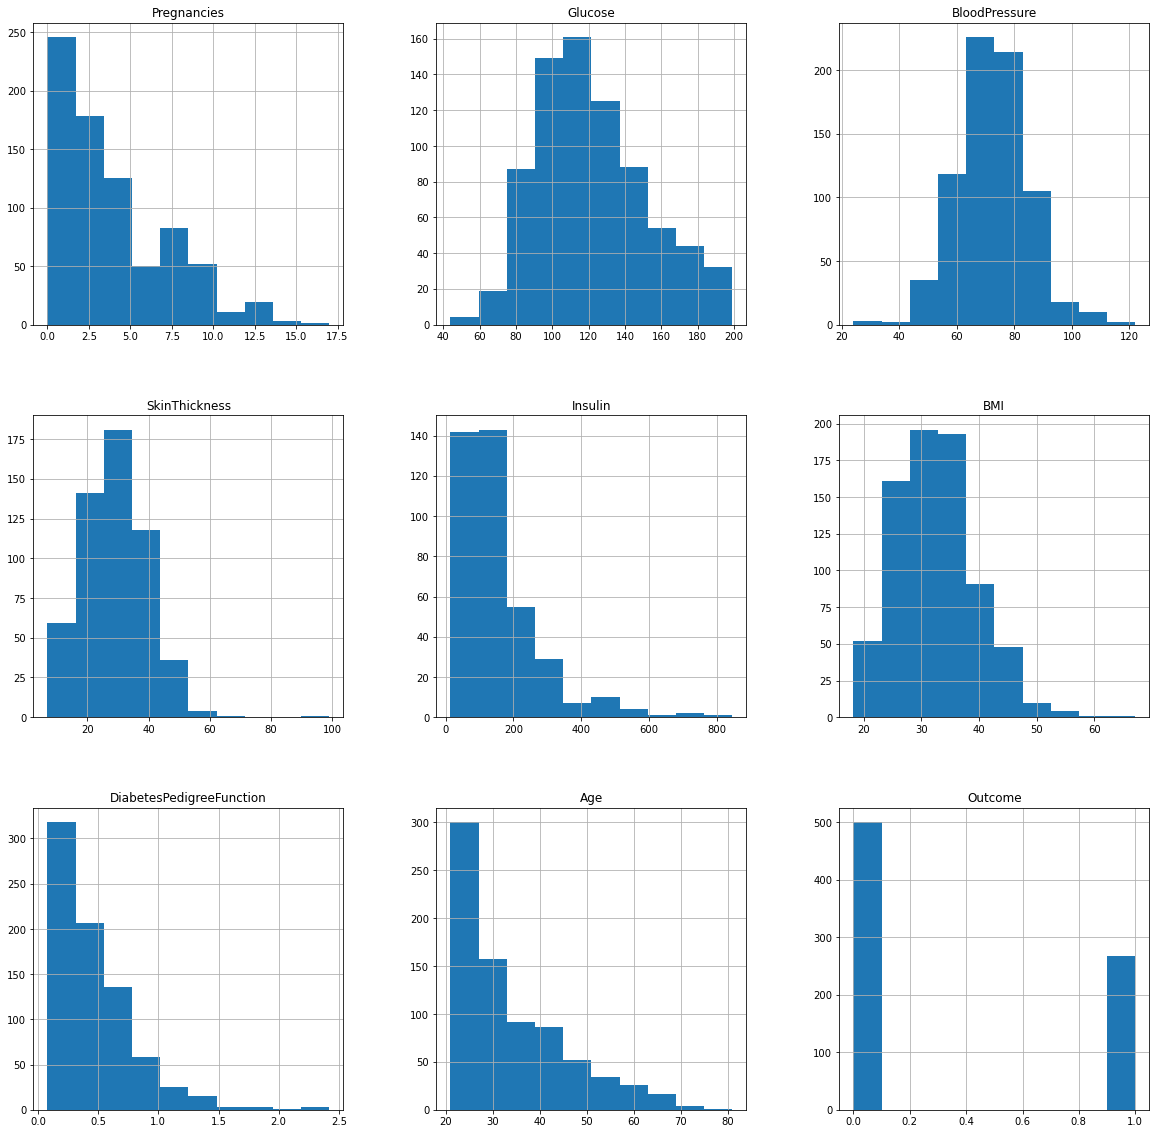

In [12]:
p = diabetes_df_copy.hist(figsize = (20,20))

### Zweiter Fehler: Nan-Werte für die Spalten entsprechend ihrer Verteilung zu errechnen

Anhand der Verteilung ersetzen wir nun die fehlenden Werte.

**Aufgabe 3**: Warum ersetzen wir `Insulin`, `BMI` und `SkinThickness` duch den **Median** der jeweiligen Spalte und nicht wie `Glucose` und `BloodPressure` durch den **Mittelwert**?

In [13]:
# SOLUTION HERE

Hier einmal die Links zu den Funktionen, falls Ihr den Code nachvollziehen wollt.

- [pandas.DataFrame.fillna](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html)
- [pandas.DataFrame.mean](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html)
- [pandas.DataFrame.median](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.median.html)

In [14]:
diabetes_df_copy['Glucose'].fillna(diabetes_df_copy['Glucose'].mean(), inplace = True)
diabetes_df_copy['BloodPressure'].fillna(diabetes_df_copy['BloodPressure'].mean(), inplace = True)
diabetes_df_copy['SkinThickness'].fillna(diabetes_df_copy['SkinThickness'].median(), inplace = True)
diabetes_df_copy['Insulin'].fillna(diabetes_df_copy['Insulin'].median(), inplace = True)
diabetes_df_copy['BMI'].fillna(diabetes_df_copy['BMI'].median(), inplace = True)

In [15]:
# Prüfe, ob die Werte durch NaN ersetzt worden sind
diabetes_df_copy.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

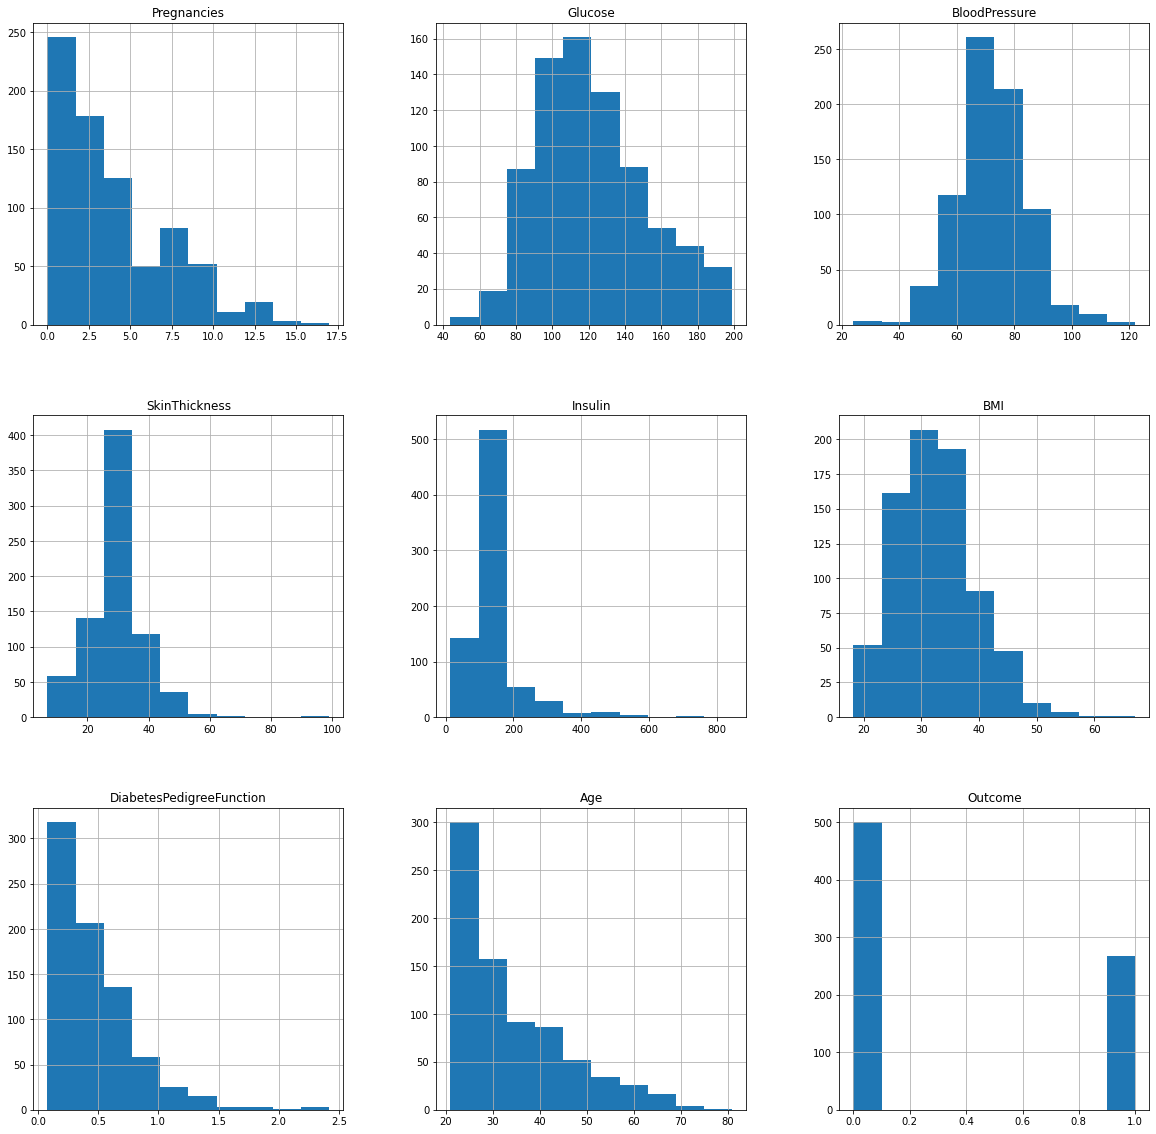

In [16]:
p = diabetes_df_copy.hist(figsize = (20,20))

## Store the Data

Meistens wollen wir mit dem gesäuberten Dataframe weiterabeiten, damit wir sicher sich, dass dieses auch gespeichert wird, persistieren wir dieses, bevor wir mit der Analyse weitermachen

In [17]:
df_diabetes_clean = diabetes_df_copy.copy()
df_diabetes_clean.to_csv('src/diabetes_clean.csv', index=False)

## Exploratory Data Analysis
Hier werden dann die variablen genauer untersucht. Welche Variablen sind wirklich wichtig, wo findet man Korrelationen etc.

### Überprüfung der Ausgewogenheit der Daten durch Auftragen der Ergebnisse nach ihrem Wert

Hier einmal die Links zu den Funktionen, falls Ihr den Code nachvollziehen wollt.

- [pandas.DataFrame.value_counts](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html)
- [pandas.DataFrame.plot.bar](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html)

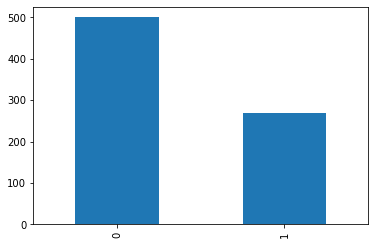

In [18]:
p=df_diabetes_clean.Outcome.value_counts().plot.bar()

### Untersuchung der Korrelation der Variablen / Dimensionen 

Gucken wir uns noch einmal die Korrelation der Variablen an - hier werden erste Zusammenhänge bereits sehr ersichtlich. Hierzu verwenden wir wieder eine Methode aus dem Pandas Package.

```python
pandas.DataFrame.corr
```

Hier zur Dokumentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

Als Varible verwenden wir den Standard Korrelationskoeffizient, auch Pearson correlation coefficient genannt. Diese Methode ist ein mögliches Maß zur Maß zur Darlegung des linearen Zusammenhangs zwischen zwei Merkmalen.

Um die zurückgegebene Matrix mit den Korrelationen lesbarer zu machen, färben wir die Werte ein.

In [19]:
diabetes_corr = df_diabetes_clean.corr(method='pearson')
diabetes_corr.style.background_gradient(cmap='Blues')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.081770,0.025047,0.021559,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192686,0.419064,0.231128,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.191853,0.045087,0.281199,-0.002763,0.324595,0.166074
SkinThickness,0.081770,0.192686,0.191853,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
Insulin,0.025047,0.419064,0.045087,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.021559,0.231128,0.281199,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


Eine *positive Korrelation* ist zwischen folgenden Variablen zu beobachten:
- Alter und Schwangere
- Glukose und Outcome
- Hautdicke und Insulin

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Maschine Learning Teil

Für die weitere Analyse würden wir nun die Daten in Test und Train aufteilen, weitere Analysen durchführen und uns für eine Modell entscheiden, welches bestmöglich vorhersagt, ob eine Person Diabetes hat oder nicht.

1. Trainingsset vorbereiten
1. Performance Metricen überlegen
1. Feature Engineering
1. Modelling
    1. Model1
        1. Model1 definieren
        1. Model1 training
        1. Model1 Performance Assessment
    1. Modelx
        1. Modelx definieren
        1. Modelx training
        1. Modelx Performance Assessment
1. Hyperparameter tuning

Das würden wir uns in einem folgenden Kurse genauer ansehen. Nun werden wir uns erst einmal auf erste Analysen stürzen.


**Aufgabe 4:**

1. Was für eine Performance Metrik könnte hier als Maßstab für ein Modell verwendet werden?
2. Was für ein Feature Engineering / Data Transformation Aspekt könnte hier eine Rolle spielen?

In [20]:
# SOLUTION HERE

1. Recall | Sensitivity - Sicher gehen, dass wir alle Fälle korrekt diagnostizieren, auch wenn wir viele falsche Positive erhalten
2. Wenn Algorithmen verwendet werden, die Abstände berechnen, könnte eine Skalierung auf den selben Wertebereich sinnvoll sein

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Ergebnisse kommunizieren / visualisieren

### Beziehung zwischen Glukose und Insulin darstellen

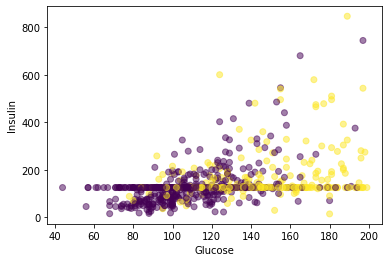

In [21]:
# Streudiagramm mit matplotlib, wobei x = Glucose und y = Insulin und alpha = 0,5 (Transparent)
plt.scatter(x=df_diabetes_clean['Glucose'], y=df_diabetes_clean['Insulin'], alpha=0.5, c=df_diabetes_clean['Outcome'])
# Benenne die X-Achse Glucose
plt.xlabel("Glucose")
# Benenne die Y-Achste Insulin
plt.ylabel("Insulin")
# Plotte das Diagramm
plt.show()

Es besteht eine positive Korrelation zwischen den Variablen Glukose und Insulin. Das ist einfach zu interpretieren, da eine Person mit höheren Glukosespiegeln erwartet würde, dass sie mehr Insulin einnimmt.

###  Beziehung zwischen Ergebnis und Alter visualisieren

Dazu erstellen wir einen Boxplot mit folgendem Code:

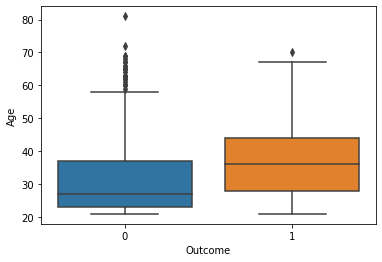

In [22]:
sns.boxplot(data=df_diabetes_clean, x="Outcome", y="Age")
plt.show()

Aus der obigen Grafik kann gesehen werden, dass ältere Menschen mit größerer Wahrscheinlichkeit an Diabetes erkrankt sind. Das Medianalter für Erwachsene mit Diabetes liegt bei etwa 35 Jahren, während es bei Menschen ohne Diabetes niedriger ist.


**Es können viele weitere Interpreationen gewählt weden - wichtig ist ein entsprechenden Fazit.**

## Interpretation / Kurze Zusammenfassung

Menschen mit Diabetes sind mit hoher Wahrscheinlichkeit älter als Menschen, die keinen Diabetes haben. Sie haben auch eher höhere Glukosespiegel im Blut. Menschen mit höheren Glukosewerten neigen auch dazu, mehr Insulin zu nehmen, und diese positive Korrelation deutet darauf hin, dass Patienten mit Diabetes auch höhere Insulinwerte haben könnten (diese Korrelation kann durch Erstellen eines Streudiagramms überprüft werden).

**In der abschließenden Projektarbeit ist dies natürlich noch etwas weiter auszuführen.**

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Gibt es noch Fragen?